In [91]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
# Stop warnings
import warnings as w
w.simplefilter(action='ignore',category=FutureWarning)

# **CGT Dataset Exploration**
---

In [3]:
cgt_DF = pd.read_csv('cgt/consolidated.csv',delimiter=';')
cgt_DF

,dataset,id,property,property_holds,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime,swc,dasp
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Unchecked External Call,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,104.0,4.0
1,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Dos Under external influence,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,113.0,5.0
2,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,strict balance equality,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,132.0,NaN
3,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Unmatched type assignment,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,NaN,NaN
4,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Transaction state Dependency,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,115.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20450,eThor,0xfe9c69945687539fabbf531133838d9cce522a76,reentrancy,f,main,0xfe9c69945687539fabbf531133838d9cce522a76,NaN,NaN,NaN,6e7c7db087b6df28af12f3911a4dfa1f,90f72e7120351a8752a8da30397aa35e,107.0,1.0
20451,eThor,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,reentrancy,t,main,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,Etheramid2,ab0e2ea9e14512594f714bc485a94361,ab0e2ea9e14512594f714bc485a94361,c99576c2b5ff3122d1100b204c1eb340,af2737edbd91a12f977d2f62512ef1ad,107.0,1.0
20452,eThor,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,reentrancy,f,main,0xff3216f86a723f2c23b03b5cd1f622eb1a204159,ValentineRegistry,d2c9f4ddb6dabb91742838a31da15421,61fa6ad7678fa97cd094f14068ac4086,ff4afc0652f28856516ae18bcc004dc1,5482fbfa676268aadadd59d02aa94a2a,107.0,1.0
20453,eThor,0xff821e51150dea3ca4d201d0df4e568dc9e03239,reentrancy,f,main,0xff821e51150dea3ca4d201d0df4e568dc9e03239,NaN,NaN,NaN,ca3d8fbb2ea49f93810b316a855cc450,bf5269b022133280187cc3100be46985,107.0,1.0


In [4]:
cgt_DF.drop(cgt_DF[cgt_DF.property_holds == 'f'].index,inplace=True)
cgt_DF.reset_index(inplace=True, drop=True)
cgt_DF

,dataset,id,property,property_holds,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime,swc,dasp
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Compiler Version not fixed,t,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,103.0,NaN
1,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Missing Interrupter,t,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,NaN,NaN
2,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,High Gas Consumption Function Type,t,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,NaN,NaN
3,SolidiFI,Overflow-Underflow-3,Overflow-Underflow,t,NaN,NaN,CareerOnToken,e01ab8b006611d8612a81724edcfdc02,cd722241b984e03c3b3e7d44e5d89fab,NaN,NaN,101.0,3.0
4,ContractFuzzer,BAIC-freezing_ether,freezing_ether,t,NaN,NaN,NaN,bdefad9ebc67e44422c1a6aa51f35735,7402f4e40555aa2642a29d8020e3fa95,NaN,7179009405be91de8b6379179e62cc0c,997.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,eThor,0xfac50f760d114de38bf0a6d44f31a9c22f778db3,reentrancy,t,main,0xfac50f760d114de38bf0a6d44f31a9c22f778db3,Investment,0aef6c211111272d7254889fc692314e,ff38f6ffc05dd86deb233efbf1be30e5,f69219171b270300bf33c3ebb0831973,6a1f98a39bac67f81a98bdfaab14518b,107.0,1.0
5615,eThor,0xfcaf204852781b57c23023aa28f21437f7303505,reentrancy,t,main,0xfcaf204852781b57c23023aa28f21437f7303505,NaN,NaN,NaN,2d18bec73bf1d4e7430b34d81aa19dc2,87639c3c5c8b372d5fad93cd277d74f0,107.0,1.0
5616,eThor,0xfd981838c1cc9b534b938c56b1c2123bdc700a32,reentrancy,t,main,0xfd981838c1cc9b534b938c56b1c2123bdc700a32,NaN,NaN,NaN,d21fe1375299820512eb80f426c8bcd7,5531d8806a3a4216bda0a78716a5adc5,107.0,1.0
5617,eThor,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,reentrancy,t,main,0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc,Etheramid2,ab0e2ea9e14512594f714bc485a94361,ab0e2ea9e14512594f714bc485a94361,c99576c2b5ff3122d1100b204c1eb340,af2737edbd91a12f977d2f62512ef1ad,107.0,1.0


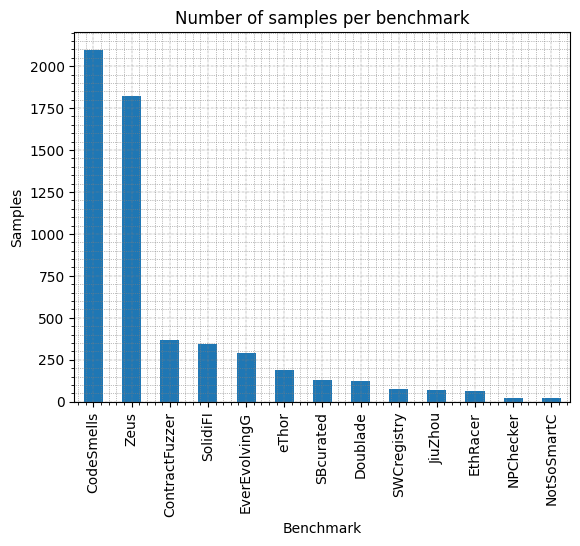

In [5]:
ax = cgt_DF['dataset'].value_counts().plot(kind='bar',title="Number of samples per benchmark")
ax.set_xlabel("Benchmark")
ax.set_ylabel("Samples")
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5");
plt.minorticks_on()
plt.show()

In [6]:
print('%d publicly available benchmarks are included in this dataset. \n The benchmarks are: \n %s' %(len(cgt_DF['dataset'].unique()), cgt_DF['dataset'].unique().tolist()))

13 publicly available benchmarks are included in this dataset. 
 The benchmarks are: 
 ['CodeSmells', 'SolidiFI', 'ContractFuzzer', 'SBcurated', 'JiuZhou', 'Doublade', 'SWCregistry', 'EthRacer', 'EverEvolvingG', 'NPChecker', 'NotSoSmartC', 'Zeus', 'eThor']


In [7]:
print('%d properties in the CGT data, which are:\n %s' %(len(cgt_DF['property'].unique()), cgt_DF['property'].unique().tolist()))

159 properties in the CGT data, which are:
 ['Compiler Version not fixed', 'Missing Interrupter', 'High Gas Consumption Function Type', 'Overflow-Underflow', 'freezing_ether', 'Deprecated APIs', 'Missing Return statement', 'Unchecked External Call', 'Nest Call', 'unchecked_low_level_calls', 'byte[]', 'strict balance equality', 'Missing Reminder', 'numberdependency', 'reentrancy', 'Block Info Dependency', 'Unused statement', 'Hard Code Address', 'Unmatched ERC-20 standard', 'Unmatched type assignment', 'Reentrancy', 'Timestamp-Dependency', 'Unchecked-Send', 'Greedy Contract', 'lowlevelcall_result', 'delegatecall_dangerous', 'Write the wrong constructor name', 'Dos Under external influence', 'unexpectedrevert_result', 'Re-entrancy', 'Implicit visibility level', 'Transaction state Dependency', 'Integer signedness', 'Unhandled-Exceptions', 'Any type of specified function variable', 'DOS by gaslimit', 'Storage overlap attack', 'The call address or data are externally controlled', 'Improper 

In [8]:
print('%d SWC codes in the CGT data, which are:\n %s' %(len(cgt_DF['swc'].unique()), cgt_DF['swc'].unique().tolist()))

39 SWC codes in the CGT data, which are:
 [103.0, nan, 101.0, 997.0, 104.0, 128.0, 132.0, 120.0, 107.0, 135.0, 116.0, 105.0, 112.0, 118.0, 113.0, 108.0, 115.0, 999.0, 127.0, 124.0, 110.0, 123.0, 125.0, 111.0, 130.0, 114.0, 136.0, 119.0, 106.0, 133.0, 134.0, 117.0, 996.0, 109.0, 995.0, 129.0, 131.0, 102.0, 100.0]


In [9]:
print('%d DASP ranks in the CGT data, which are:\n %s' %(len(cgt_DF['dasp'].unique()), cgt_DF['dasp'].unique().tolist()))

10 DASP ranks in the CGT data, which are:
 [nan, 3.0, 4.0, 5.0, 6.0, 1.0, 8.0, 2.0, 7.0, 9.0]


# **Convert CGT DS into Multi-Label DS**
---

In [11]:
#Remove label columns
cgt_MultiDS = cgt_DF.drop(['property','property_holds','swc','dasp'],axis=1)
# Remove duplicate ids
cgt_MultiDS = cgt_MultiDS.drop_duplicates('fp_sol',keep='first',ignore_index=True)
cgt_MultiDS.dropna(subset=["fp_sol"], inplace=True)
cgt_MultiDS.reset_index(inplace=True, drop=True)
cgt_MultiDS

,dataset,id,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd
1,SolidiFI,Overflow-Underflow-3,NaN,NaN,CareerOnToken,e01ab8b006611d8612a81724edcfdc02,cd722241b984e03c3b3e7d44e5d89fab,NaN,NaN
2,ContractFuzzer,BAIC-freezing_ether,NaN,NaN,NaN,bdefad9ebc67e44422c1a6aa51f35735,7402f4e40555aa2642a29d8020e3fa95,NaN,7179009405be91de8b6379179e62cc0c
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,main,0x00674045bb7c17f0aa1cde34780d6c51af548728,MultiSigWalletWithDailyLimit,a6c230ff97ae1906c6f9c50c18250437,490a68bcbbf7b3570c5a36970549c130,6b9bb083e105127506d422e220a01bb2,cd9e73cc1e8213426c31824ae1ccb14d
4,SolidiFI,Overflow-Underflow-30,NaN,NaN,SKYBITToken,acb72f1f3b2898b62d6d841f999e5c77,60946c853b87744818818b7d1104bc14,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2589,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,main,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,MyToken,3ad8ca0d65457183607db655ec5515fc,5eaa8db515fcb90b9a8fe9433023702a,17534d58784c3ccc84b2590f5ac37836,36d7b360e7da4f5c4a8780ca67a4d735
2590,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,main,0xda7fa6e0b04c76683f54c973931862d7fe474a85,ReverseRegistrar,eebbd1de0bd005402b5dde75513c45f6,e535017bfaba64d1a8c58854b048912b,95d9a00f215094472920dcd16476143c,dac3176f688dc206ebdaf8585b9576eb
2591,eThor,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,main,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,SellTokens,9771fd04b2f53e344bbe3e9d57f4d2a5,9771fd04b2f53e344bbe3e9d57f4d2a5,48f01bc765c33c69b163f0d65de68333,93ded3d7ded537fe774bdb936d02cd35
2592,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,main,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,Registrar,bf67c31c3dc1e827ccf49d883ce3bbc0,c603e12acc5f0433d4d2cb046bb39399,aeac88ee822f0a6e2bc5b22797ef94ab,fd3dd4d0b4bd744c4f7957af10d00ea3


## **Two mult-label columns: SWC and DASP**
---

In [12]:
#Add two mult-label columns: SWC and DASP
cgt_MultiDS['property']= ''
cgt_MultiDS['SWC']=''
cgt_MultiDS['DASP']= ''

for index, row in cgt_MultiDS.iterrows():
    #extract rows for a specific contract (id)
    subDF = cgt_DF[cgt_DF['fp_sol'] == row['fp_sol']]
    #Remove None values
    SWC= subDF['swc'].unique().tolist()
    SWC = [int(x) for x in SWC if not math.isnan(x)]
    DASP = subDF['dasp'].unique().tolist()
    DASP = [int(x) for x in DASP if not math.isnan(x)]
    property = subDF['property'].unique().tolist()
    #property = [int(x) for x in property if not math.isnan(x)]
    #Set values of label columns
    cgt_MultiDS.at[index,'SWC'] = sorted(SWC)
    cgt_MultiDS.at[index,'DASP'] = sorted(DASP)
    cgt_MultiDS.at[index,'property'] = sorted(property)

cgt_MultiDS.to_csv('./EDA_Outcomes/mult-label_CGT_DS.csv',index=False)

In [13]:
cgt_MultiDS

,dataset,id,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime,property,SWC,DASP
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,"[Compiler Version not fixed, High Gas Consumpt...",[103],[]
1,SolidiFI,Overflow-Underflow-3,NaN,NaN,CareerOnToken,e01ab8b006611d8612a81724edcfdc02,cd722241b984e03c3b3e7d44e5d89fab,NaN,NaN,[Overflow-Underflow],[101],[3]
2,ContractFuzzer,BAIC-freezing_ether,NaN,NaN,NaN,bdefad9ebc67e44422c1a6aa51f35735,7402f4e40555aa2642a29d8020e3fa95,NaN,7179009405be91de8b6379179e62cc0c,[freezing_ether],[997],[]
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,main,0x00674045bb7c17f0aa1cde34780d6c51af548728,MultiSigWalletWithDailyLimit,a6c230ff97ae1906c6f9c50c18250437,490a68bcbbf7b3570c5a36970549c130,6b9bb083e105127506d422e220a01bb2,cd9e73cc1e8213426c31824ae1ccb14d,"[Deprecated APIs, Missing Interrupter, Missing...",[],[]
4,SolidiFI,Overflow-Underflow-30,NaN,NaN,SKYBITToken,acb72f1f3b2898b62d6d841f999e5c77,60946c853b87744818818b7d1104bc14,NaN,NaN,[Overflow-Underflow],[101],[3]
...,...,...,...,...,...,...,...,...,...,...,...,...
2589,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,main,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,MyToken,3ad8ca0d65457183607db655ec5515fc,5eaa8db515fcb90b9a8fe9433023702a,17534d58784c3ccc84b2590f5ac37836,36d7b360e7da4f5c4a8780ca67a4d735,[reentrancy],[107],[1]
2590,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,main,0xda7fa6e0b04c76683f54c973931862d7fe474a85,ReverseRegistrar,eebbd1de0bd005402b5dde75513c45f6,e535017bfaba64d1a8c58854b048912b,95d9a00f215094472920dcd16476143c,dac3176f688dc206ebdaf8585b9576eb,[reentrancy],[107],[1]
2591,eThor,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,main,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,SellTokens,9771fd04b2f53e344bbe3e9d57f4d2a5,9771fd04b2f53e344bbe3e9d57f4d2a5,48f01bc765c33c69b163f0d65de68333,93ded3d7ded537fe774bdb936d02cd35,[reentrancy],[107],[1]
2592,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,main,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,Registrar,bf67c31c3dc1e827ccf49d883ce3bbc0,c603e12acc5f0433d4d2cb046bb39399,aeac88ee822f0a6e2bc5b22797ef94ab,fd3dd4d0b4bd744c4f7957af10d00ea3,[reentrancy],[107],[1]


## **SWC Labeled Data**
---

In [14]:
cgt_MultiDS_SWC = pd.DataFrame(columns=['fp_sol','100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '123', '124', '125', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '995', '996', '997', '999'])

for index, row in cgt_MultiDS.iterrows():
    cgt_MultiDS_SWC.at[index,'fp_sol'] = row['fp_sol']
    for code in row['SWC']:
        cgt_MultiDS_SWC.at[index,str(code)] = 1
cgt_MultiDS_SWC.fillna(0, inplace=True)
cgt_MultiDS_SWC.to_csv('./EDA_Outcomes/cgt_MultiDS_SWC.csv',index=False)

In [15]:
cgt_MultiDS_SWC

,fp_sol,100,101,102,103,104,105,106,107,108,...,131,132,133,134,135,136,995,996,997,999
0,7391ec54eca9eb37bd2cd1d7263097a6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e01ab8b006611d8612a81724edcfdc02,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bdefad9ebc67e44422c1a6aa51f35735,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,a6c230ff97ae1906c6f9c50c18250437,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acb72f1f3b2898b62d6d841f999e5c77,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,3ad8ca0d65457183607db655ec5515fc,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2590,eebbd1de0bd005402b5dde75513c45f6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2591,9771fd04b2f53e344bbe3e9d57f4d2a5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2592,bf67c31c3dc1e827ccf49d883ce3bbc0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **DASP Labeled Data**
---

In [16]:
cgt_MultiDS_DASP = pd.DataFrame(columns=['fp_sol','1','2','3','4','5','6','7','8','9'])

for index, row in cgt_MultiDS.iterrows():
    cgt_MultiDS_DASP.at[index,'fp_sol'] = row['fp_sol']
    for code in row['DASP']:
        cgt_MultiDS_DASP.at[index,str(code)] = 1
cgt_MultiDS_DASP.fillna(0, inplace=True)

cgt_MultiDS_DASP.to_csv('./EDA_Outcomes/cgt_MultiDS_DASP.csv',index=False)

In [17]:
cgt_MultiDS_DASP

,fp_sol,1,2,3,4,5,6,7,8,9
0,7391ec54eca9eb37bd2cd1d7263097a6,0,0,0,0,0,0,0,0,0
1,e01ab8b006611d8612a81724edcfdc02,0,0,1,0,0,0,0,0,0
2,bdefad9ebc67e44422c1a6aa51f35735,0,0,0,0,0,0,0,0,0
3,a6c230ff97ae1906c6f9c50c18250437,0,0,0,0,0,0,0,0,0
4,acb72f1f3b2898b62d6d841f999e5c77,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2589,3ad8ca0d65457183607db655ec5515fc,1,0,0,0,0,0,0,0,0
2590,eebbd1de0bd005402b5dde75513c45f6,1,0,0,0,0,0,0,0,0
2591,9771fd04b2f53e344bbe3e9d57f4d2a5,1,0,0,0,0,0,0,0,0
2592,bf67c31c3dc1e827ccf49d883ce3bbc0,1,0,0,0,0,0,0,0,0


# **Data Visualization**
---

## **Actual Number of Samples**
---

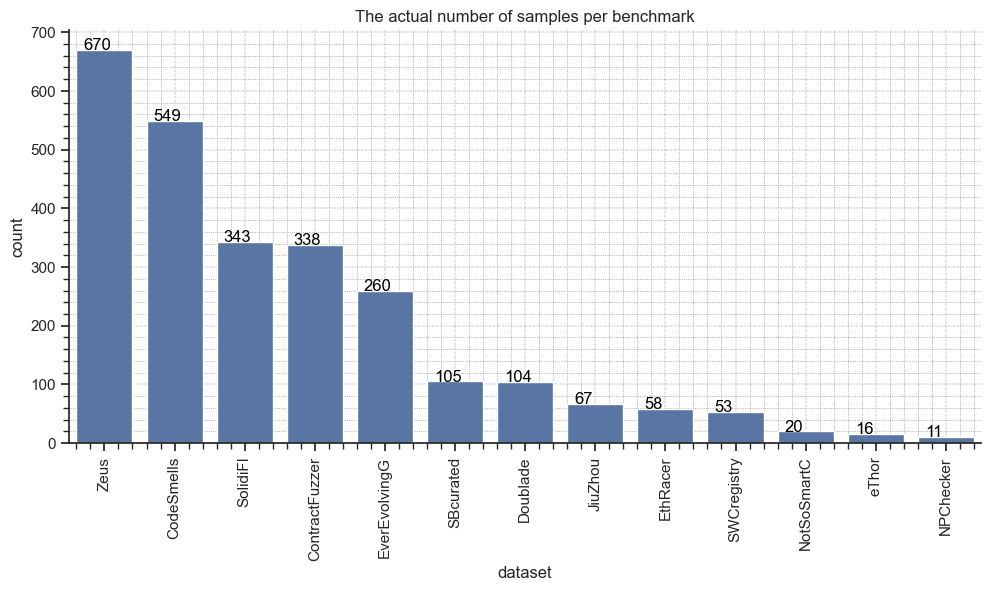

In [19]:
sns.set(style='ticks')
#create grouped bar chart

g=sns.catplot(x='dataset', y='count', data=pd.DataFrame(data=cgt_MultiDS['dataset'].value_counts()), kind='bar', height=5, aspect=2)

ax.set_xlabel("Benchmark")
ax.set_ylabel("Samples")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.title('The actual number of samples per benchmark', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")
   
plt.xticks(rotation = 90)
plt.minorticks_on()

## **SWC Labels Frequency**
---

In [20]:
SWC_Labels_Statistic= pd.DataFrame(columns=['SWC Code','Frequency'])
codes= cgt_MultiDS_SWC.columns.tolist()
codes.pop(0)

for index in range(0, len(codes)):
    SWC_Labels_Statistic.at[index,'SWC Code'] = codes[index]
    SWC_Labels_Statistic.at[index,'Frequency'] = sum(cgt_MultiDS_SWC[codes[index]])
SWC_Labels_Statistic

,SWC Code,Frequency
0,100,1
1,101,711
2,102,1
3,103,513
4,104,355
5,105,58
6,106,6
7,107,300
8,108,3
9,109,5


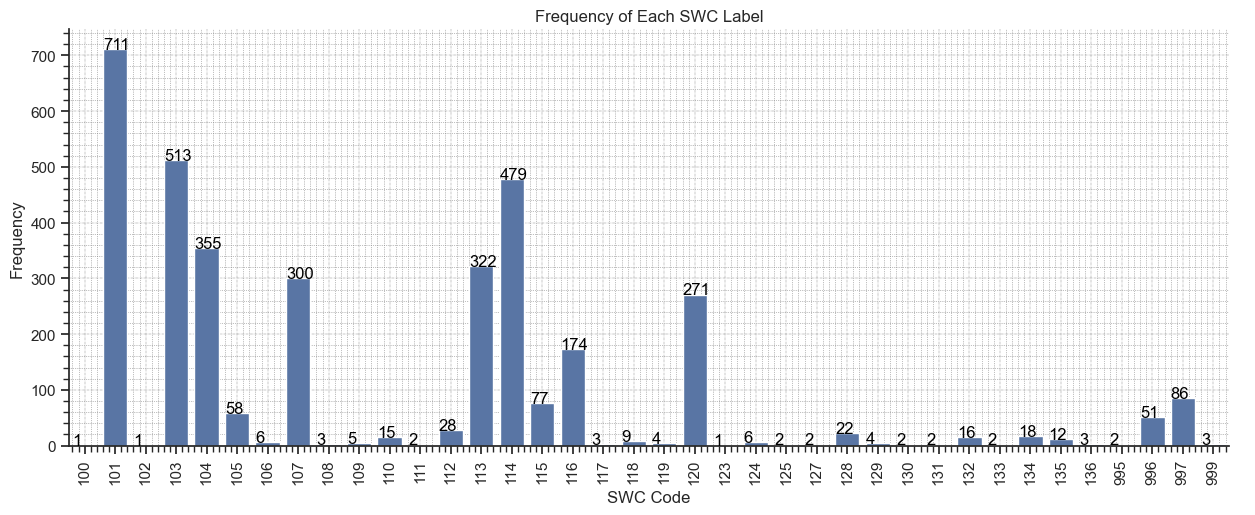

In [21]:
sns.set(style='ticks')
#create grouped bar chart

g=sns.catplot(x='SWC Code', y='Frequency', data=pd.DataFrame(data=SWC_Labels_Statistic), kind='bar', height=5, aspect=2.5)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.title('Frequency of Each SWC Label', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")
   
plt.xticks(rotation = 90)
plt.minorticks_on()

## **DASP Labels Frequency**
---

In [22]:
DASP_Labels_Statistic= pd.DataFrame(columns=['DASP Rank','Frequency'])
codes= cgt_MultiDS_DASP.columns.tolist()
codes.pop(0)
DASP_Labels = ['Reentrancy','Access Control','Arithmetic','Unchecked Return Values','DoS','Bad Randomness','Front-Running','Time manipulation','Short Address Attack']

for index in range(0, len(codes)):
    DASP_Labels_Statistic.at[index,'DASP Rank'] = DASP_Labels[index]
    DASP_Labels_Statistic.at[index,'Frequency'] = sum(cgt_MultiDS_DASP[codes[index]])
DASP_Labels_Statistic

,DASP Rank,Frequency
0,Reentrancy,300
1,Access Control,184
2,Arithmetic,714
3,Unchecked Return Values,355
4,DoS,356
5,Bad Randomness,271
6,Front-Running,479
7,Time manipulation,174
8,Short Address Attack,2


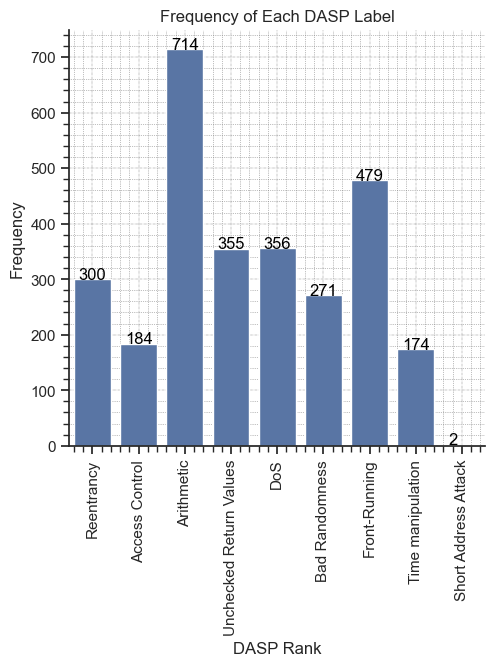

In [23]:
sns.set(style='ticks')
#create grouped bar chart

g=sns.catplot(x='DASP Rank', y='Frequency', data=pd.DataFrame(data=DASP_Labels_Statistic), kind='bar', height=5, aspect=1)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black', size='medium')
    
plt.title('Frequency of Each DASP Label', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")
   
plt.xticks(rotation = 90)
plt.minorticks_on()

# **Samples Selection**
---

## **Identify Solidity Version of Samples**
---

In [24]:
cgt_MultiDS_SolVersions = pd.DataFrame(columns=['dataset','id','fp_sol','Address','SolidityVersion'])
cgt_MultiDS_SolVersions['dataset'] = cgt_MultiDS['dataset']
cgt_MultiDS_SolVersions['id'] = cgt_MultiDS['id']
cgt_MultiDS_SolVersions['fp_sol'] = cgt_MultiDS['fp_sol']
cgt_MultiDS_SolVersions['Address'] = cgt_MultiDS['addr']
cgt_MultiDS_SolVersions

,dataset,id,fp_sol,Address,SolidityVersion
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,NaN
1,SolidiFI,Overflow-Underflow-3,e01ab8b006611d8612a81724edcfdc02,NaN,NaN
2,ContractFuzzer,BAIC-freezing_ether,bdefad9ebc67e44422c1a6aa51f35735,NaN,NaN
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,NaN
4,SolidiFI,Overflow-Underflow-30,acb72f1f3b2898b62d6d841f999e5c77,NaN,NaN
...,...,...,...,...,...
2589,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,3ad8ca0d65457183607db655ec5515fc,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,NaN
2590,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,eebbd1de0bd005402b5dde75513c45f6,0xda7fa6e0b04c76683f54c973931862d7fe474a85,NaN
2591,eThor,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,9771fd04b2f53e344bbe3e9d57f4d2a5,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,NaN
2592,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,bf67c31c3dc1e827ccf49d883ce3bbc0,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,NaN


In [25]:
def checkSolVersion(filename):
    file = open(filename,"r")
    code = file.readlines()
    file.close()
    version = ""
    for line in range(0,len(code)):
        if 'pragma' in code[line]:
            data = code[line].rstrip().rsplit(";")
            solVersion = data[0].rsplit(" ")
            version = solVersion[len(solVersion)-1]
            flag = 0
            for i in range(0, len(version)):
                if version[i].isdigit():
                    version = version[i:]
                    break
                else:
                    flag += 1
                    if len(version) == flag:
                        version = None
                        break
            break
    return(version)

In [26]:
sourcCodeFiles_Path = './cgt/source/'
notFoundIDs = []
for filename in os.listdir(sourcCodeFiles_Path):
    FP_SOL = filename.rsplit('.')[0]
    version = checkSolVersion(sourcCodeFiles_Path + filename)
    if len(cgt_MultiDS_SolVersions.query("fp_sol == @FP_SOL"))>0:
        index = cgt_MultiDS_SolVersions.query("fp_sol == @FP_SOL").index[0]
        cgt_MultiDS_SolVersions.at[index,'SolidityVersion'] = version
    else:
        notFoundIDs.append(FP_SOL)
print('%d ids are not found:' %len(notFoundIDs))
print(notFoundIDs)

509 ids are not found:
['eb988f63de4e33ed3c0216c2b3b84904', 'fb2de87dd95f467e3d733b871c0ab169', '4d92062bdba141f799776a738f8edfba', 'f6747631153a17dc01dc6606f7284f6b', '77bd069d7e6f290da86c92a99dc9f095', '050d9b669e0a36a25d8bcdfdab64cc2d', '12cb73a15ca26bf59c4183bd067c5906', '5d84c2027026b4128cfe6696678f5d39', '3dc7f3f85140e79447717693933bb4c5', 'be23a920e0816b5cb9a3f8a657e7232d', 'c91e62967b34fe655a41e6401eed8623', 'fe4740d612b8a1eb0c448692fd3b058d', 'b034f1c33a31e7874066edd7833b5320', '80b24f62fdbb2922b8ba3a2af305c6f9', '5b2d5d9f0b175c925807af7945344b72', '362ebb645a4a9974a6fc143867e8ed3e', '148d743b221f86c98f6a20b7ca1427e3', '65b904a4249f2c1308ae14e4250b31d2', 'b3f0539490f0cb3a97dd187a3a8d14a2', '9e3910cb081d57cf42a1bf9718ddc90d', 'fd3648006318f4924009da5954b0b0b8', '3d621d123e2dedc7eb65b7bc9f88ebc3', '7380763578935dfc1d8bccebc0b5d941', 'e33cc523fc940e79b8e656e7b6f1e85c', '0560aa97c1cfa7d21268ac72dbfe6c53', '560ef3f0f0f23a6517d24048eccc78dd', '2ea57dc653b20d6fae61b6083b721fb8', '683

In [28]:
print('Solidity version of each contract: ')
cgt_MultiDS_SolVersions

Solidity version of each contract: 


,dataset,id,fp_sol,Address,SolidityVersion
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,SolidiFI,Overflow-Underflow-3,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,ContractFuzzer,BAIC-freezing_ether,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
4,SolidiFI,Overflow-Underflow-30,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...,...,...
2589,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,3ad8ca0d65457183607db655ec5515fc,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,0.4.2
2590,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,eebbd1de0bd005402b5dde75513c45f6,0xda7fa6e0b04c76683f54c973931862d7fe474a85,0.4.0
2591,eThor,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,9771fd04b2f53e344bbe3e9d57f4d2a5,0xe3b6638f0c1c0fa37282fab6ef9457e457a1e9a8,
2592,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,bf67c31c3dc1e827ccf49d883ce3bbc0,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,0.4.0


## **Frequency of SC Versions**
---

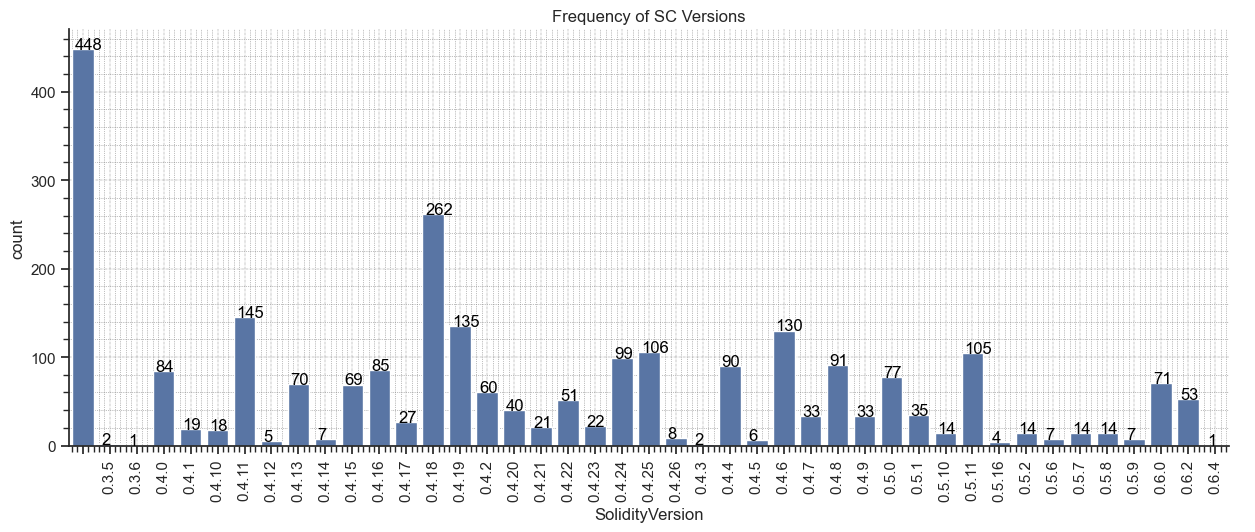

In [29]:
sns.set(style='ticks')
g=sns.catplot(x='SolidityVersion', y='count', data=pd.DataFrame(data=cgt_MultiDS_SolVersions['SolidityVersion'].value_counts().sort_index()), kind='bar', height=5, aspect=2.5)

plt.title('Frequency of SC Versions', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.xticks(rotation = 90)
plt.minorticks_on()

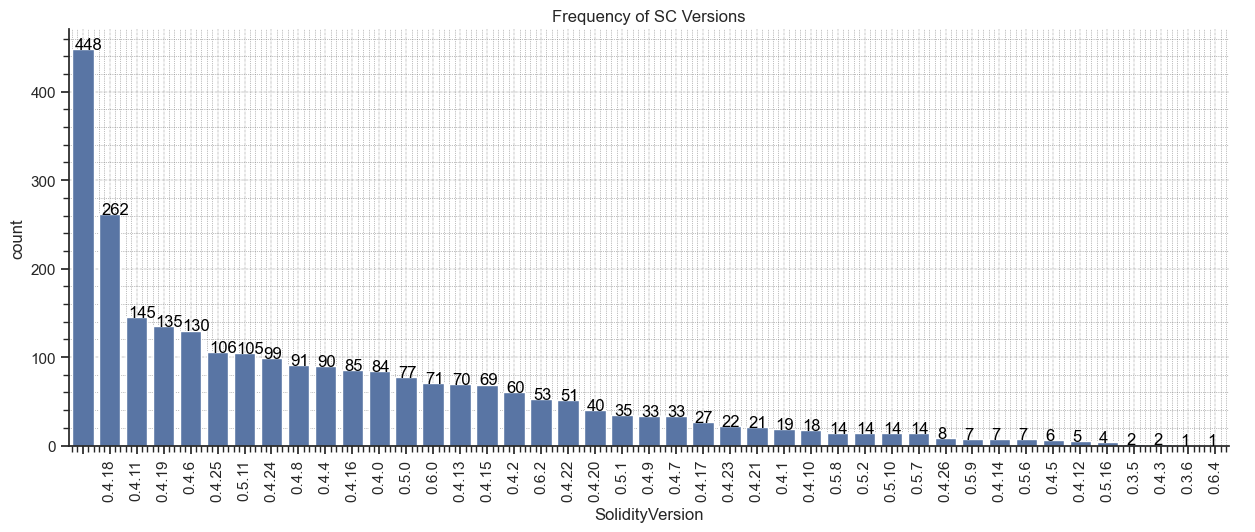

In [30]:
sns.set(style='ticks')
g=sns.catplot(x='SolidityVersion', y='count', data=pd.DataFrame(data=cgt_MultiDS_SolVersions['SolidityVersion'].value_counts()), kind='bar', height=5, aspect=2.5)

plt.title('Frequency of SC Versions', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.xticks(rotation = 90)
plt.minorticks_on()

## **Determine the Study Sample Set**
*   **To be selected, the following conditions must be met:**
    *   Solidity version is declared, i.e. version value is not None.
    *   The solidity version is supported by current analysis tools.
        *   solc supports version 0.4.0 and above.
---

### **Remove unuseful samples**
---

In [31]:
cgt_MultiDS_StudySet = cgt_MultiDS_SolVersions

In [32]:
#Remove samples with None Solidity version
cgt_MultiDS_StudySet['SolidityVersion'].replace('', np.nan, inplace=True)
cgt_MultiDS_StudySet.dropna(subset=["SolidityVersion"], inplace=True)
cgt_MultiDS_StudySet.reset_index(inplace=True, drop=True)
cgt_MultiDS_StudySet

,dataset,id,fp_sol,Address,SolidityVersion
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,SolidiFI,Overflow-Underflow-3,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,ContractFuzzer,BAIC-freezing_ether,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
4,SolidiFI,Overflow-Underflow-30,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...,...,...
2132,eThor,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,d60ec58f0a89005f2905c62603bda99a,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,0.4.8
2133,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,3ad8ca0d65457183607db655ec5515fc,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,0.4.2
2134,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,eebbd1de0bd005402b5dde75513c45f6,0xda7fa6e0b04c76683f54c973931862d7fe474a85,0.4.0
2135,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,bf67c31c3dc1e827ccf49d883ce3bbc0,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,0.4.0


In [33]:
#Remove samples that use unsupported Solidity compiler versions
toBeDroped = []
for index, row in cgt_MultiDS_StudySet.iterrows():
    if int(row['SolidityVersion'][2]) < 4:
        toBeDroped.append(index)
cgt_MultiDS_StudySet=cgt_MultiDS_StudySet.drop(index= toBeDroped)
cgt_MultiDS_StudySet.reset_index(inplace=True, drop=True)
cgt_MultiDS_StudySet

,dataset,id,fp_sol,Address,SolidityVersion
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,SolidiFI,Overflow-Underflow-3,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,ContractFuzzer,BAIC-freezing_ether,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
4,SolidiFI,Overflow-Underflow-30,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...,...,...
2129,eThor,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,d60ec58f0a89005f2905c62603bda99a,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,0.4.8
2130,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,3ad8ca0d65457183607db655ec5515fc,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,0.4.2
2131,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,eebbd1de0bd005402b5dde75513c45f6,0xda7fa6e0b04c76683f54c973931862d7fe474a85,0.4.0
2132,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,bf67c31c3dc1e827ccf49d883ce3bbc0,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,0.4.0


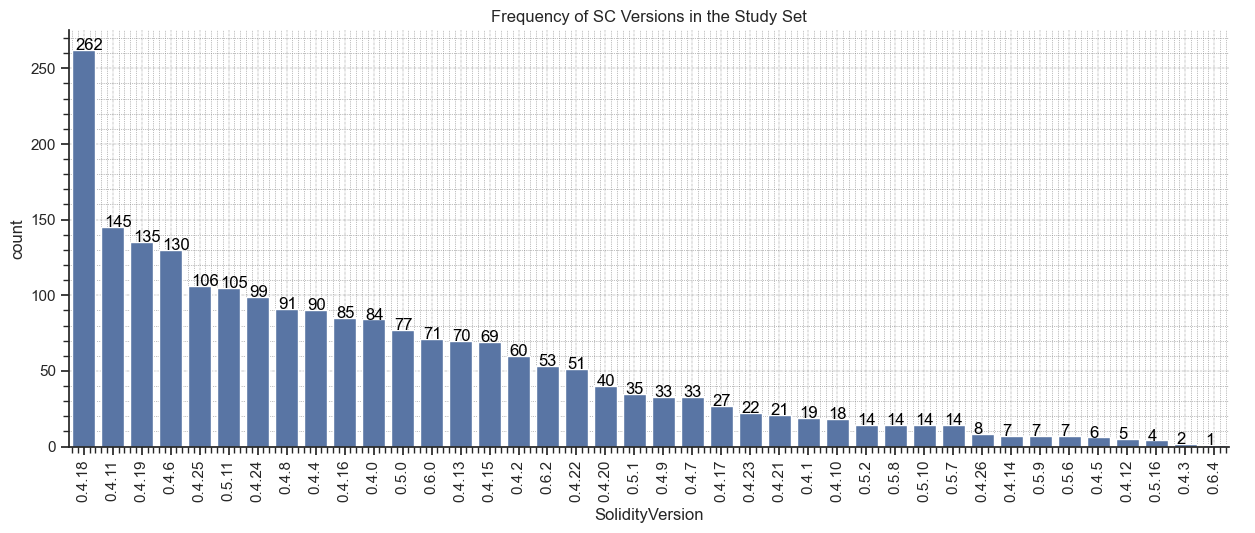

In [34]:
sns.set(style='ticks')
g=sns.catplot(x='SolidityVersion', y='count', data=pd.DataFrame(data=cgt_MultiDS_StudySet['SolidityVersion'].value_counts()), kind='bar', height=5, aspect=2.5)

plt.title('Frequency of SC Versions in the Study Set', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black',  size='medium')
    
plt.xticks(rotation = 90)
plt.minorticks_on()

### **Extract Source Code Files & Versions**
---

In [35]:
import shutil
files = cgt_MultiDS_StudySet['fp_sol']

for file in files:
    shutil.copy2('./cgt/source/'+file+'.sol', './Study_SamplesSet/'+file+'.sol')

In [36]:
cgt_MultiDS_StudySet = cgt_MultiDS_StudySet.reset_index(drop=True)
cgt_MultiDS_StudySet

,dataset,id,fp_sol,Address,SolidityVersion
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16
1,SolidiFI,Overflow-Underflow-3,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1
2,ContractFuzzer,BAIC-freezing_ether,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14
4,SolidiFI,Overflow-Underflow-30,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11
...,...,...,...,...,...
2129,eThor,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,d60ec58f0a89005f2905c62603bda99a,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,0.4.8
2130,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,3ad8ca0d65457183607db655ec5515fc,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,0.4.2
2131,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,eebbd1de0bd005402b5dde75513c45f6,0xda7fa6e0b04c76683f54c973931862d7fe474a85,0.4.0
2132,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,bf67c31c3dc1e827ccf49d883ce3bbc0,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,0.4.0


In [37]:
samplesInfo = open('./Study_SamplesSet/SamplesInfo.txt','w')
for index, row in cgt_MultiDS_StudySet.iterrows():
    line = row['fp_sol'] + ':' + row['SolidityVersion']
    samplesInfo.write(line)
    if index < len(cgt_MultiDS_StudySet) - 1:
        samplesInfo.write('\n')
samplesInfo.close()

### **Multi-Labeled Base DS**
---

In [38]:
cgt_MultiDS_StudySet['property'] = ''
cgt_MultiDS_StudySet['SWC'] = ''
cgt_MultiDS_StudySet['DASP'] = ''

for index, row in cgt_MultiDS_StudySet.iterrows():
    currentID= row['id']
    id = cgt_MultiDS.query("id == @currentID").index[0]
    cgt_MultiDS_StudySet.at[index,'property'] = cgt_MultiDS['property'].iloc[id]
    cgt_MultiDS_StudySet.at[index,'SWC'] = cgt_MultiDS['SWC'].iloc[id]
    cgt_MultiDS_StudySet.at[index,'DASP'] = cgt_MultiDS['DASP'].iloc[id]
cgt_MultiDS_StudySet.to_csv('./EDA_Outcomes/cgt_MultiDS_StudySet.csv',index=False)
cgt_MultiDS_StudySet

,dataset,id,fp_sol,Address,SolidityVersion,property,SWC,DASP
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,7391ec54eca9eb37bd2cd1d7263097a6,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0.4.16,"[Compiler Version not fixed, High Gas Consumpt...",[103],[]
1,SolidiFI,Overflow-Underflow-3,e01ab8b006611d8612a81724edcfdc02,NaN,0.5.1,[Overflow-Underflow],[101],[3]
2,ContractFuzzer,BAIC-freezing_ether,bdefad9ebc67e44422c1a6aa51f35735,NaN,0.4.24,[freezing_ether],[997],[]
3,CodeSmells,0x00674045bb7c17f0aa1cde34780d6c51af548728,a6c230ff97ae1906c6f9c50c18250437,0x00674045bb7c17f0aa1cde34780d6c51af548728,0.4.14,"[Deprecated APIs, Missing Interrupter, Missing...",[],[]
4,SolidiFI,Overflow-Underflow-30,acb72f1f3b2898b62d6d841f999e5c77,NaN,0.5.11,[Overflow-Underflow],[101],[3]
...,...,...,...,...,...,...,...,...
2129,eThor,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,d60ec58f0a89005f2905c62603bda99a,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,0.4.8,[reentrancy],[107],[1]
2130,eThor,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,3ad8ca0d65457183607db655ec5515fc,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,0.4.2,[reentrancy],[107],[1]
2131,eThor,0xda7fa6e0b04c76683f54c973931862d7fe474a85,eebbd1de0bd005402b5dde75513c45f6,0xda7fa6e0b04c76683f54c973931862d7fe474a85,0.4.0,[reentrancy],[107],[1]
2132,eThor,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,bf67c31c3dc1e827ccf49d883ce3bbc0,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,0.4.0,[reentrancy],[107],[1]


In [39]:
cgt_MultiDS_StudySet['dataset'].value_counts()

dataset
CodeSmells        493
SolidiFI          343
Zeus              341
ContractFuzzer    314
EverEvolvingG     258
SBcurated          96
Doublade           93
JiuZhou            67
SWCregistry        51
EthRacer           46
NotSoSmartC        17
eThor               9
NPChecker           6
Name: count, dtype: int64

In [40]:
datasets = cgt_MultiDS_StudySet['dataset'].unique().tolist()
datasets

['CodeSmells',
 'SolidiFI',
 'ContractFuzzer',
 'SBcurated',
 'JiuZhou',
 'Doublade',
 'SWCregistry',
 'EthRacer',
 'EverEvolvingG',
 'NPChecker',
 'NotSoSmartC',
 'Zeus',
 'eThor']

In [41]:
for DS in datasets:
    subData = cgt_MultiDS_StudySet[cgt_MultiDS_StudySet.dataset == DS]
    subData.to_csv('./EDA_Outcomes/BaseDS/' + DS +'.csv',index=False)

### **SWC Labeled Base DS**
---

In [42]:
cgt_MultiDS_StudySet_SWC = pd.DataFrame(columns=['id','100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '123', '124', '125', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '995', '996', '997', '999'])

for index, row in cgt_MultiDS_StudySet.iterrows():
    cgt_MultiDS_StudySet_SWC.at[index,'id'] = row['id']
    for code in row['SWC']:
        cgt_MultiDS_StudySet_SWC.at[index,str(code)] = 1
cgt_MultiDS_StudySet_SWC.fillna(0, inplace=True)
cgt_MultiDS_StudySet_SWC.to_csv('./EDA_Outcomes/cgt_MultiDS_StudySet_SWC.csv',index=False)
cgt_MultiDS_StudySet_SWC

,id,100,101,102,103,104,105,106,107,108,...,131,132,133,134,135,136,995,996,997,999
0,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Overflow-Underflow-3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BAIC-freezing_ether,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0x00674045bb7c17f0aa1cde34780d6c51af548728,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Overflow-Underflow-30,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2130,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2131,0xda7fa6e0b04c76683f54c973931862d7fe474a85,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2132,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### **DASP Labeled Base DS**
---

In [43]:
cgt_MultiDS_StudySet_DASP = pd.DataFrame(columns=['id','1','2','3','4','5','6','7','8','9','10'])

for index, row in cgt_MultiDS_StudySet.iterrows():
    cgt_MultiDS_StudySet_DASP.at[index,'id'] = row['id']
    for code in row['DASP']:
        cgt_MultiDS_StudySet_DASP.at[index,str(code)] = 1
cgt_MultiDS_StudySet_DASP.fillna(0, inplace=True)

cgt_MultiDS_StudySet_DASP.to_csv('./EDA_Outcomes/cgt_MultiDS_StudySet_DASP.csv',index=False)
cgt_MultiDS_StudySet_DASP

,id,1,2,3,4,5,6,7,8,9,10
0,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,0,0,0,0,0,0,0,0,0,0
1,Overflow-Underflow-3,0,0,1,0,0,0,0,0,0,0
2,BAIC-freezing_ether,0,0,0,0,0,0,0,0,0,0
3,0x00674045bb7c17f0aa1cde34780d6c51af548728,0,0,0,0,0,0,0,0,0,0
4,Overflow-Underflow-30,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2129,0xcd3e727275bc2f511822dc9a26bd7b0bbf161784,1,0,0,0,0,0,0,0,0,0
2130,0xd41f3b51e0c2d825a1178582d27c84dbfe48d1af,1,0,0,0,0,0,0,0,0,0
2131,0xda7fa6e0b04c76683f54c973931862d7fe474a85,1,0,0,0,0,0,0,0,0,0
2132,0xee2157c15a43be80faac64801ed89c8d8e2c4d3a,1,0,0,0,0,0,0,0,0,0


### **DASP Labels Frequency in Base DS**
---

In [44]:
DASP_Labels_Statistic_BaseDS= pd.DataFrame(columns=['DASP Rank','Frequency'])
codes= cgt_MultiDS_StudySet_DASP.columns.tolist()
codes.pop(0)
DASP_Labels = ['Reentrancy','Access Control','Arithmetic','Unchecked Return Values','DoS','Bad Randomness','Front-Running','Time manipulation','Short Address Attack','Unknown Unknowns']

for index in range(0, len(codes)):
    DASP_Labels_Statistic_BaseDS.at[index,'DASP Rank'] = DASP_Labels[index]
    DASP_Labels_Statistic_BaseDS.at[index,'Frequency'] = sum(cgt_MultiDS_StudySet_DASP[codes[index]])
DASP_Labels_Statistic_BaseDS

,DASP Rank,Frequency
0,Reentrancy,180
1,Access Control,177
2,Arithmetic,398
3,Unchecked Return Values,189
4,DoS,210
5,Bad Randomness,194
6,Front-Running,292
7,Time manipulation,172
8,Short Address Attack,2
9,Unknown Unknowns,0


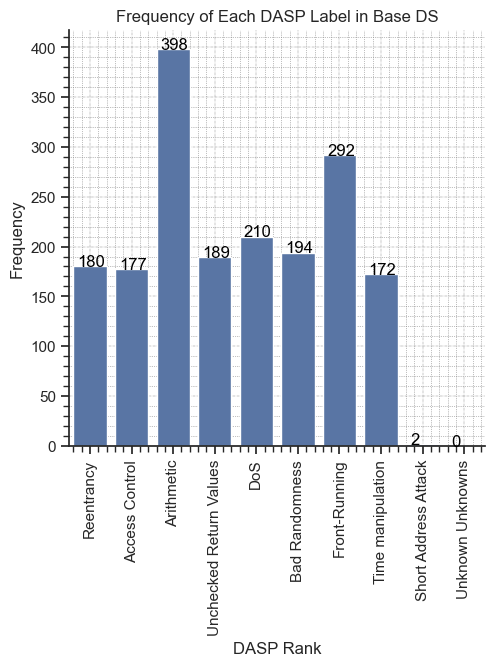

In [45]:
sns.set(style='ticks')
#create grouped bar chart

g=sns.catplot(x='DASP Rank', y='Frequency', data=pd.DataFrame(data=DASP_Labels_Statistic_BaseDS), kind='bar', height=5, aspect=1)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1,
            p.get_height()* 1 ,
            '{0:.0f}'.format(p.get_height()),
            color='black', size='medium')
    
plt.title('Frequency of Each DASP Label in Base DS', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5")
   
plt.xticks(rotation = 90)
plt.minorticks_on()

# **Statistics on Selected DBases**
---

In [237]:
SDBase = ['Doublade','JiuZhou','SBcurated','SolidiFI']

In [260]:
def read_DBase(DBase):
    df = pd.read_csv('./EDA_Outcomes/BaseDS/'+DBase+'.csv',converters={'DASP': literal_eval})
    return df

In [259]:
def DASP_Counts_list(DBase):
    countList =  pd.DataFrame(columns=['Total','Total Positive Samples','1','2','3','4','5','6','7','8','9'])
    countList.at[0,'Total'] = len(DBase)
    countList.at[0,'Total Positive Samples'] = 0
    for i in range(1,10):
        countList.at[0,str(i)] = 0

    for index, row in DBase.iterrows():
        if len(DBase.at[index,'DASP']) >= 1:
           countList.at[0,'Total Positive Samples'] =  countList.at[0,'Total Positive Samples'] + 1
           for i in range(1,10):
               countList.at[0,str(i)] =  countList.at[0,str(i)] + 1 if i in DBase.at[index,'DASP'] else countList.at[0,str(i)]
    '''for i in range(1,10):
        if countList.at[0,str(i)] == 1:
            countList.at[0,'Total Positive Samples'] =  countList.at[0,'Total Positive Sample'] + 1
            break'''
        

    return countList

## **A. Value Counts**
---

In [261]:
Doublade = read_DBase(SDBase[0])
Doublade['DASP'].value_counts()
Doublade_DASP_Counts = DASP_Counts_list(Doublade)
Doublade_DASP_Counts

,Total,Total Positive Samples,1,2,3,4,5,6,7,8,9
0,93,93,15,20,0,39,26,0,0,0,0


In [262]:
JiuZhou = read_DBase(SDBase[1])
JiuZhou['DASP'].value_counts()
JiuZhou_DASP_Counts = DASP_Counts_list(JiuZhou)
JiuZhou_DASP_Counts

,Total,Total Positive Samples,1,2,3,4,5,6,7,8,9
0,67,32,3,10,5,1,8,1,1,2,1


In [263]:
SBcurated = read_DBase(SDBase[2])
SBcurated['DASP'].value_counts()
SBcurated_DASP_Counts = DASP_Counts_list(SBcurated)
SBcurated_DASP_Counts

,Total,Total Positive Samples,1,2,3,4,5,6,7,8,9
0,96,93,15,13,13,35,4,6,4,4,1


In [264]:
SolidiFI = read_DBase(SDBase[3])
SolidiFI['DASP'].value_counts()
SolidiFI_DASP_Counts = DASP_Counts_list(SolidiFI)
SolidiFI_DASP_Counts

,Total,Total Positive Samples,1,2,3,4,5,6,7,8,9
0,343,343,49,98,49,49,0,0,49,49,0


## **Patterns Frequency per DBase**
---

### **Plotting Data Preparation**
---

In [265]:
countsData = Doublade_DASP_Counts.values.tolist()[0] + JiuZhou_DASP_Counts.values.tolist()[0] + SBcurated_DASP_Counts.values.tolist()[0] + SolidiFI_DASP_Counts.values.tolist()[0]
len(countsData)

44

In [266]:
Labels = ['Dataset Size','Positive Samples','Reentrancy','Access Control','Arithmetic','Unchecked Return Values','DoS','Bad Randomness','Front-Running','Time manipulation','Short Address Attack']

In [267]:
#create DataFrame
CountsDataDF_DF = pd.DataFrame({'Vulnerability': Labels*4,
                                  'Counts': countsData,
                                  'Benchmarks': ['Doublade']*11 + ['JiuZhou']*11 + ['SBcurated']*11 + ['SolidiFI']*11})

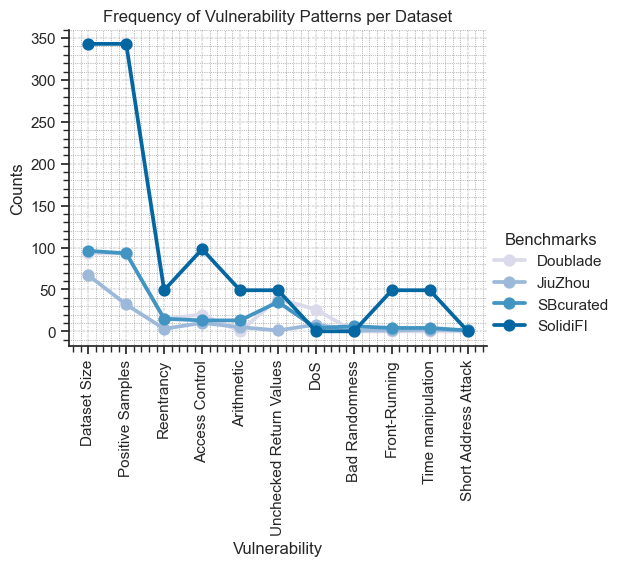

In [271]:
#set seaborn plotting aesthetics
sns.set(style='ticks')
#create grouped bar chart
g=sns.catplot(x='Vulnerability', y='Counts', hue='Benchmarks', data=CountsDataDF_DF, kind='point', height=4, aspect=1.3,palette="PuBu")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_height(),
            p.get_height()* 1,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='vertical', size='medium')

plt.title('Frequency of Vulnerability Patterns per Dataset', fontsize=12)
plt.grid(True, color = "grey", which='major', linewidth = "0.3", linestyle = "-.")
plt.grid(True, color="grey", which='minor', linestyle=':', linewidth="0.5");
plt.xticks(rotation = 90)
plt.minorticks_on()

#plt.savefig('path')